In [2]:
import tensorflow as tf
import numpy as np

import cv2
import IPython.display as display
import PIL.Image

from tensorflow import keras

%load_ext autoreload
%autoreload 2

нарисовать каждый класс и примеры картинок этого класса

In [3]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

## Optimize activations

In [4]:
# load model
model = keras.models.load_model("data/cifar10_cnn_no_bn.hdf5")
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 32)        9248

In [8]:
# define optimizator
from optimizators import ActivationOptimizer

ao = ActivationOptimizer(
    model=model,
    layer_name="conv2d_27",
    activation_index=(slice(None), slice(None), 0),
    steps=2000,
    step_size=0.001,
    reg_coef=0.1,
)

In [9]:
# optimize
random_image = tf.random.uniform(
    [32, 32, 3],
    minval=0,
    maxval=None,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None,
)

loss, image_raw = ao(random_image)
print(loss.numpy())

Tracing
1137.6664


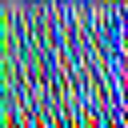

In [10]:
image = 255 * (image_raw)
image = tf.cast(image, tf.uint8)
image = np.array(image)
# resize
image = cv2.resize(image, (128, 128))
PIL.Image.fromarray(image)

### Analize all layers